# Exercises: LangChain - Custom Tasks

- Author: Martin Fockedey


In this notebook, you will find exercises to be performed by an LLM, where you are asked to analyze the impact of temperature and model choice:


1. **Count the vowels in a word**
2. **Count the number of possible outputs for different temperature levels (between 0 and 1)**
3. **Measure the latency differences for different models**


Each exercise is accompanied by instructions and a solution to complete or execute. 

**You are asked not to use AI like copilote to write code in order for you to really understand how the langchain framework works. The code is not supposed to becomplicated**

## Environment Setup

Set up the environment.

**[Note]**
- You'll need a Mistral AI API key. You have one on your Teams group channel.
- Store your API key in a `.env` file as `MISTRAL_API_KEY`

In [ ]:
# Configuration file to manage the API KEY as an environment variable
from dotenv import load_dotenv

# Load API KEY information
load_dotenv(override=True)

True

## Exercise 1: Let the LLM count vowels in a word

**Instructions:**

For different models from mistral AI and for different level of temperature between 0 and 1, analyze the performance of the model in counting the number of vowels.

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_mistralai import ChatMistralAI
import numpy as np
instruction = "How many vowels (a, e, i, o, u, y) are in the word '{word}'? Just return the number."
temperatures = np.array([0,0.25, 0.5 ,0.75, 1.0])
models = ["mistral-small", "mistral-large-latest", "open-mixtral-8x22b"]
words = ["ordinateur", "intelligence", "artificielle", "langage", "modèle", "apprentissage", "données", "réseau", "neural", "algorithme",
        "informatique", "système", "analyse", "prédiction", "classification", "régression", "clustering", "visualisation", "statistiques", "optimisation", "simulation",
        "test","kiuhqjfhq","azertyuiop","aeiouy","bcdfghjklmnpqrstvwxz","arbre","éléphant","ordinateur","université","éducation","programmation","développement","technologie",
        "innovation","créativité","collaboration","communication","projet","gestion","organisation","planification","stratégie","analyse","décision","résolution","problème","solution",
        "équipe","leadership","motivation"]

# ----- YOUR CODE -----

# Analyze the results: Are they correct? If not, why might the LLM make mistakes?

### Example of expected graph for the first exercice
You should obtain a graph with differents curves for each model, put on the horizontal x axis the level of temperature between (0 and 1) and on the vertical y axis the number of correct decimals of pi given by the model. Here is an example of the expected graph format with the **wrong** trends.

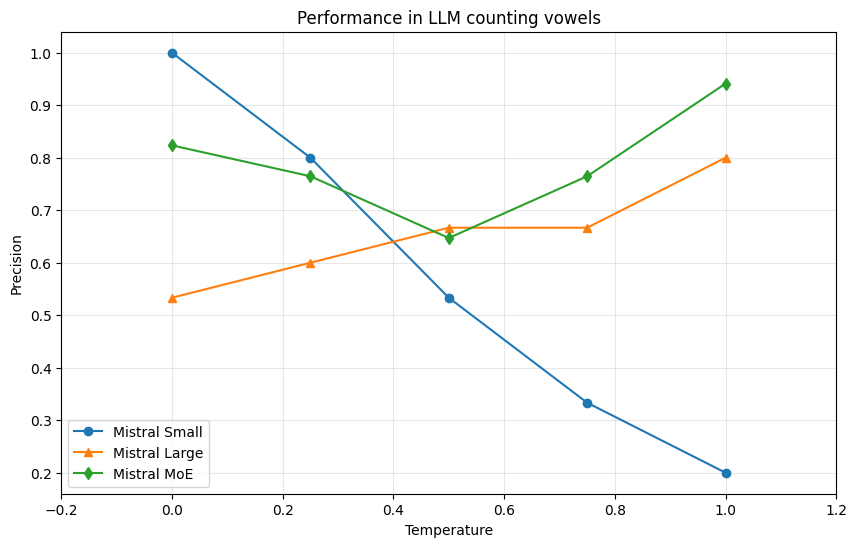

In [44]:
import numpy as np

import matplotlib.pyplot as plt

# Create temperature values (x-axis)
temperatures = np.array([0.0,0.25, 0.5,0.75, 1.0])

# Simulate different trends for 4 different models
model1 = np.array([15, 12, 8, 5, 3])/15

# Model 2: stable then decreasing
model2 = np.array([12, 11, 12, 8, 10])/15

# Model 3: sharp decrease
model3 = np.array([8, 9, 10, 10, 12])/15

# Model 4: gradual decrease
model4 = np.array([14, 13, 11, 13, 16])/17

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(temperatures, model1, marker='o', label='Mistral Small')
plt.plot(temperatures, model3, marker='^', label='Mistral Large')
plt.plot(temperatures, model4, marker='d', label='Mistral MoE')

plt.xlabel('Temperature')
plt.ylabel('Precision')
plt.title('Performance in LLM counting vowels')
plt.xlim(-0.2, 1.2)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

## Exercise 2: Let the LLM generate outputs at different temperature levels

**Instructions:**

For a given question, use an LLM to generate multiple outputs at different temperature settings (e.g., 0, 0.2, 0.5, 0.7, 1). For each temperature, run the LLM several times and count the number of unique outputs. Analyze how the diversity of responses changes with temperature. Discuss your findings.

In [9]:
from collections import defaultdict
from langchain_mistralai import ChatMistralAI

question = "What is the largest animal in the world?"
temperatures = [0, 0.2, 0.5, 0.7, 1]

# ----- YOUR CODE -----


---

## Exercise 3: Measure response time (latency)

Instructions:
- For a fixed prompt, measure the total time an LLM takes to return a complete response (end-to-end latency) and the time/token
- Repeat N times per setting to account for stochasticity; compute the average .
- Discuss how latency varies with model size.
- Set a limit to the number of tokens to 1000 to avoid long responses
-  `Optional` : Use streaming generation to measure the time from sending the request to receiving the first token also called Time To First Token (TTFT).

In [ ]:
import time
import numpy as np
from langchain_mistralai import ChatMistralAI


models = ["mistral-small", "mistral-large-latest", "open-mixtral-8x22b"]


prompt = "Explain why the sky is blue in one long paragraph."
repeats = 10

latency_stats = {}

for model_name in models:
    pass
# YOUR CODE STARTS HERE



# Pretty print
for model_name, stats in latency_stats.items():
    print(f"\nModel: {model_name}")
    print(f"  Avg Latency: {stats['avg']:.3f}s")
    print(f"  Avg Time/Token: {stats['time_per_token']:.3f}s")
    print(f"  Runs: {stats['runs']}")



Model: mistral-small
  Avg Latency: 6.468s
  Avg Time/Token: 0.023s
  Runs: 10

Model: mistral-large-latest
  Avg Latency: 9.621s
  Avg Time/Token: 0.027s
  Runs: 10

Model: open-mixtral-8x22b
  Avg Latency: 2.381s
  Avg Time/Token: 0.010s
  Runs: 10
